# Sentiment Dynamics in Relation to Political Stance on Reddit


## Dataset Overview
We use two main datasets:
- `text_comments.csv`: Contains user comments from Reddit, offering insights into user sentiments and interactions.
- `text_submissions.csv`: Comprises submissions data, providing context for the discussions happening in various subreddits.

Our aim is to process these datasets, perform sentiment analysis, and visualize the findings to answer our key research questions.


#### Data Loading and Initial Processing
In this section, we load the entire set of preprocessed comment data. This comprehensive dataset will provide us with a complete view of user interactions and sentiments on Reddit, which is crucial for our analysis. We will also perform initial steps to clean and prepare the data, ensuring it is ready for in-depth exploration and analysis in subsequent sections of this project. The comment dataframe is being prepocessed (see file `comment_sentiment_preprocess.ipynb`)

In [1]:
import pandas as pd
import numpy as np

In [2]:
submissions_df = pd.read_csv('text_submissions.csv')
submissions_df.head()

/var/folders/z8/q4fxp_5165v0q8pz4py830xc0000gn/T/ipykernel_82717/2941954188.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions_df = pd.read_csv('text_submissions.csv')


,id,author,created_utc,domain,is_self,score,selftext,title,subreddit
0,t3_npxigk,All_Consuming_Void,1622563615,self.BeautyGuruChatter,True,0.0,[removed],Hyram launches his own brand,BeautyGuruChatter
1,t3_nqj6bf,AutoModerator,1622631621,self.BeautyGuruChatter,True,38.0,What are the influencers trying to influence y...,What I'm not gonna buy Wednesday - Anti-haul,BeautyGuruChatter
2,t3_nk0btr,barrahhhh,1621869439,reddit.com,False,144.0,NaN,Plouise goes off in facebook group for 'bullying',BeautyGuruChatter
3,t3_nrbybs,[deleted],1622722260,self.BeautyGuruChatter,True,2.0,[deleted],Is youtube algorithm against Susan Yara? She g...,BeautyGuruChatter
4,t3_nl0ebd,carlosShook,1621977767,vm.tiktok.com,False,0.0,NaN,Sephora steals concept from Huntr Faulknr afte...,BeautyGuruChatter


In [3]:
# Check for null values in each column
null_values = submissions_df.isnull().sum()
print("Null Values in Each Column:\n", null_values)

Null Values in Each Column:
 id                   0
author               0
created_utc          0
domain             601
is_self              1
score                1
selftext       1609827
title                7
subreddit            2
dtype: int64


In [4]:
invalid_utc = pd.to_numeric(submissions_df['created_utc'], errors='coerce').isna()
print(submissions_df[invalid_utc])
submissions_df['created_utc'] = pd.to_numeric(submissions_df['created_utc'], errors='coerce')
submissions_df = submissions_df.dropna(subset=['created_utc'])
submissions_df['created_utc'] = pd.to_datetime(submissions_df['created_utc'], unit='s')
submissions_df.head()

                                                  id  \
3485356  I suspect it's going to be a long night! :(   

                             author created_utc domain is_self  score  \
3485356  Oh Bugger - It's Halloween       CPTSD    NaN     NaN    NaN   

        selftext title subreddit  
3485356      NaN   NaN       NaN  


,id,author,created_utc,domain,is_self,score,selftext,title,subreddit
0,t3_npxigk,All_Consuming_Void,2021-06-01 16:06:55,self.BeautyGuruChatter,True,0.0,[removed],Hyram launches his own brand,BeautyGuruChatter
1,t3_nqj6bf,AutoModerator,2021-06-02 11:00:21,self.BeautyGuruChatter,True,38.0,What are the influencers trying to influence y...,What I'm not gonna buy Wednesday - Anti-haul,BeautyGuruChatter
2,t3_nk0btr,barrahhhh,2021-05-24 15:17:19,reddit.com,False,144.0,NaN,Plouise goes off in facebook group for 'bullying',BeautyGuruChatter
3,t3_nrbybs,[deleted],2021-06-03 12:11:00,self.BeautyGuruChatter,True,2.0,[deleted],Is youtube algorithm against Susan Yara? She g...,BeautyGuruChatter
4,t3_nl0ebd,carlosShook,2021-05-25 21:22:47,vm.tiktok.com,False,0.0,NaN,Sephora steals concept from Huntr Faulknr afte...,BeautyGuruChatter


In [5]:
score_df = pd.read_csv('scores.csv', usecols=['community', 'partisan'])

In [6]:
comments_df = pd.read_csv('processed_comments4.csv')
comments_df.head(5)

,id,score,link_id,subreddit,created_utc,negative,neutral,positive,compound,weighted_negative,weighted_neutral,weighted_positive,weighted_compound
0,t1_ftjl56l,4,t3_gzv6so,BeautyGuruChatter,2020-06-10 02:19:18,0.234,0.402,0.364,0.5486,0.936,1.608,1.456,2.1944
1,t1_ftjpxmc,6,t3_gzv6so,BeautyGuruChatter,2020-06-10 03:06:22,0.000,0.783,0.217,0.3612,0.000,4.698,1.302,2.1672
2,t1_gzzxfyt,22,t3_nodb9e,BeautyGuruChatter,2021-05-30 18:12:37,0.050,0.830,0.119,0.7506,1.100,18.260,2.618,16.5132
3,t1_gzzy7nc,92,t3_no6qaj,BeautyGuruChatter,2021-05-30 18:19:03,0.390,0.610,0.000,-0.4939,35.880,56.120,0.000,-45.4388
4,t1_h00tpbp,82,t3_nolx7p,BeautyGuruChatter,2021-05-30 22:47:14,0.118,0.622,0.259,0.7906,9.676,51.004,21.238,64.8292


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

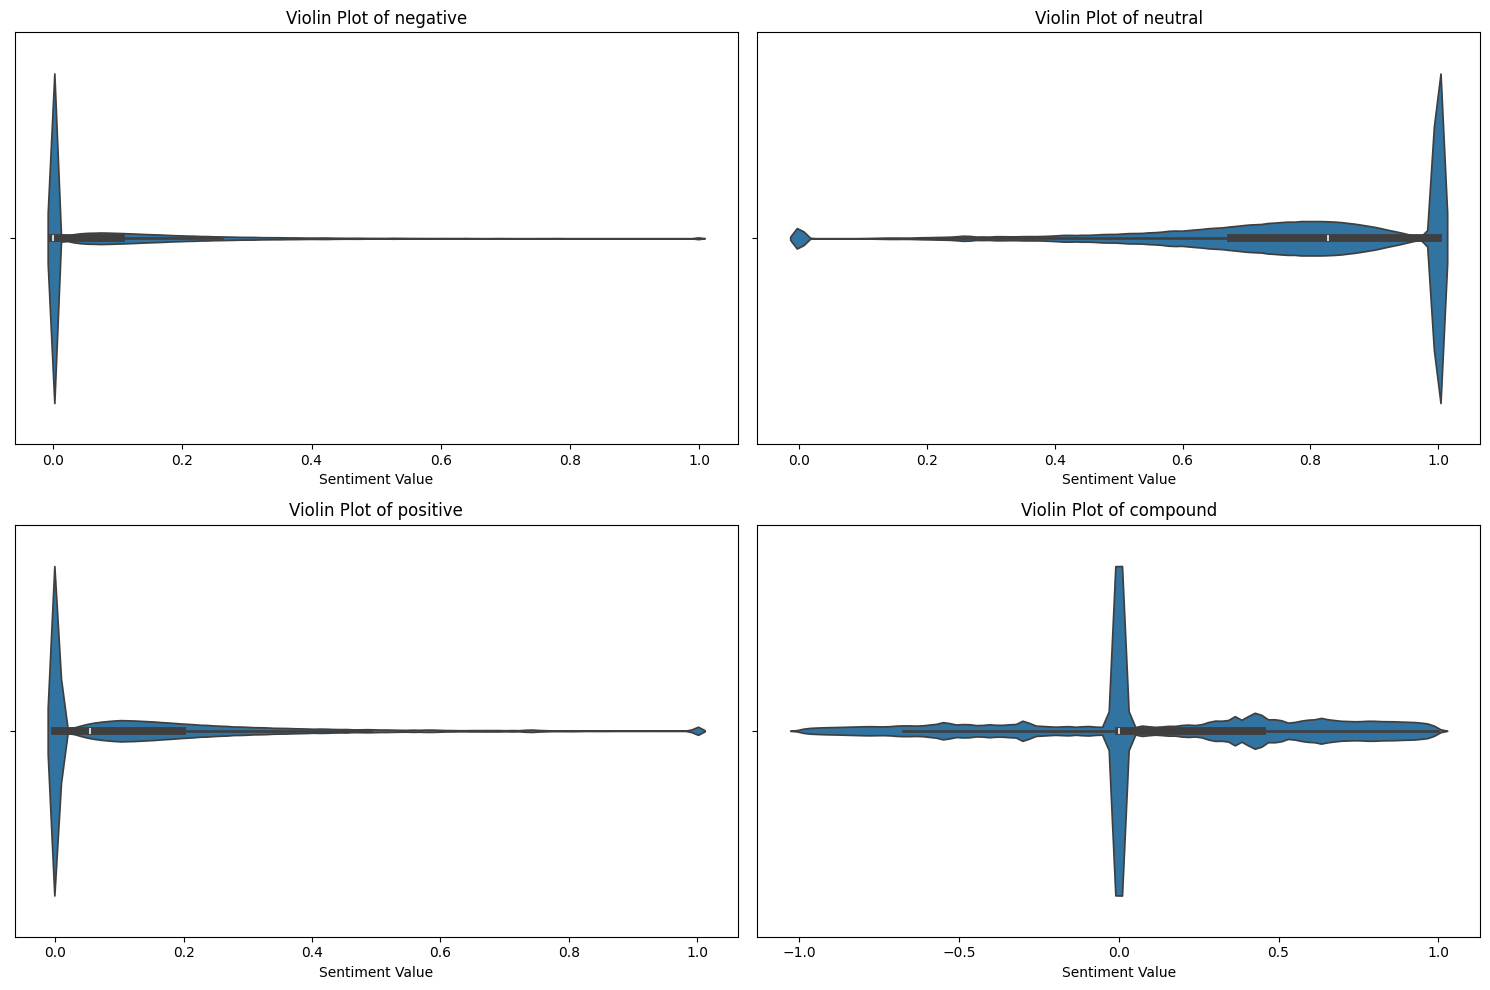

In [9]:
# List of sentiment values
sentiments = ['negative', 'neutral', 'positive', 'compound']

# Setting up the figure for subplots
plt.figure(figsize=(15, 10))

# Creating individual violin plots in a 2x2 grid
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 2, i)  # 2x2 grid, position i
    sns.violinplot(x=comments_df[sentiment])
    plt.title(f'Violin Plot of {sentiment}')
    plt.xlabel('Sentiment Value')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


The violin plots for sentiment distribution reveal that most comments tend to have low negative and positive sentiment scores, with a significant number of comments leaning towards neutrality. The compound sentiment shows a balanced spread across the spectrum, indicating a mix of both positive and negative sentiments among the subreddit comments. This suggests a diversity of sentiment expression within the community, with a slight inclination towards neutral stance.

## Investigating Sentiment Correlation with Political Orientation

To explore our main research question, we aggregate sentiment scores at the subreddit level and merge this with each subreddit's political score. We calculate the average weighted sentiment scores for each subreddit and then assess the correlation between these scores and political scores, categorized as left or right-leaning.



In [10]:
# Group by subreddit to aggregate sentiment scores and count comments
subreddit_aggregation = comments_df.groupby('subreddit').agg(
    total_weighted_negative=('weighted_negative', 'sum'),
    total_weighted_neutral=('weighted_neutral', 'sum'),
    total_weighted_positive=('weighted_positive', 'sum'),
    total_weighted_compound=('weighted_compound', 'sum'),
    comment_count=('subreddit', 'count')
).reset_index()


In [11]:
# Calculate average weighted sentiment scores across subreddits 
subreddit_aggregation['avg_weighted_negative'] = subreddit_aggregation['total_weighted_negative'] / subreddit_aggregation['comment_count']
subreddit_aggregation['avg_weighted_neutral'] = subreddit_aggregation['total_weighted_neutral'] / subreddit_aggregation['comment_count']
subreddit_aggregation['avg_weighted_positive'] = subreddit_aggregation['total_weighted_positive'] / subreddit_aggregation['comment_count']
subreddit_aggregation['avg_weighted_compound'] = subreddit_aggregation['total_weighted_compound'] / subreddit_aggregation['comment_count']


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the average weighted scores
subreddit_aggregation[['avg_weighted_negative', 'avg_weighted_neutral', 'avg_weighted_positive', 'avg_weighted_compound']] = scaler.fit_transform(
    subreddit_aggregation[['avg_weighted_negative', 'avg_weighted_neutral', 'avg_weighted_positive', 'avg_weighted_compound']]
)


In [13]:
# Create a focused dataframe with just the subreddit and the average sentiment scores
subreddit_df = subreddit_aggregation[['subreddit', 'avg_weighted_negative', 'avg_weighted_neutral', 'avg_weighted_positive', 'avg_weighted_compound']]
subreddit_df.head()

,subreddit,avg_weighted_negative,avg_weighted_neutral,avg_weighted_positive,avg_weighted_compound
0,1200isplenty,0.182894,0.197993,0.338202,0.580572
1,13ReasonsWhy,0.267666,0.160914,0.213769,0.294612
2,13or30,0.346413,0.427770,0.356974,0.408991
3,141414,0.000000,0.018451,0.000000,0.325498
4,195,0.288447,0.236577,0.340344,0.356874


In [14]:
# Merge subreddit_df with score_df
subreddit_df = subreddit_df.merge(score_df, left_on='subreddit', right_on='community', how='left')

# Rename the 'partisan' column to 'political_score'
subreddit_df.rename(columns={'partisan': 'political_score'}, inplace=True)

# Drop the additional 'community' column if it's no longer needed
subreddit_df.drop(columns='community', inplace=True)
subreddit_df.head()


,subreddit,avg_weighted_negative,avg_weighted_neutral,avg_weighted_positive,avg_weighted_compound,political_score
0,1200isplenty,0.182894,0.197993,0.338202,0.580572,-0.096164
1,13ReasonsWhy,0.267666,0.160914,0.213769,0.294612,-0.031130
2,13or30,0.346413,0.427770,0.356974,0.408991,-0.132998
3,141414,0.000000,0.018451,0.000000,0.325498,NaN
4,195,0.288447,0.236577,0.340344,0.356874,0.000541


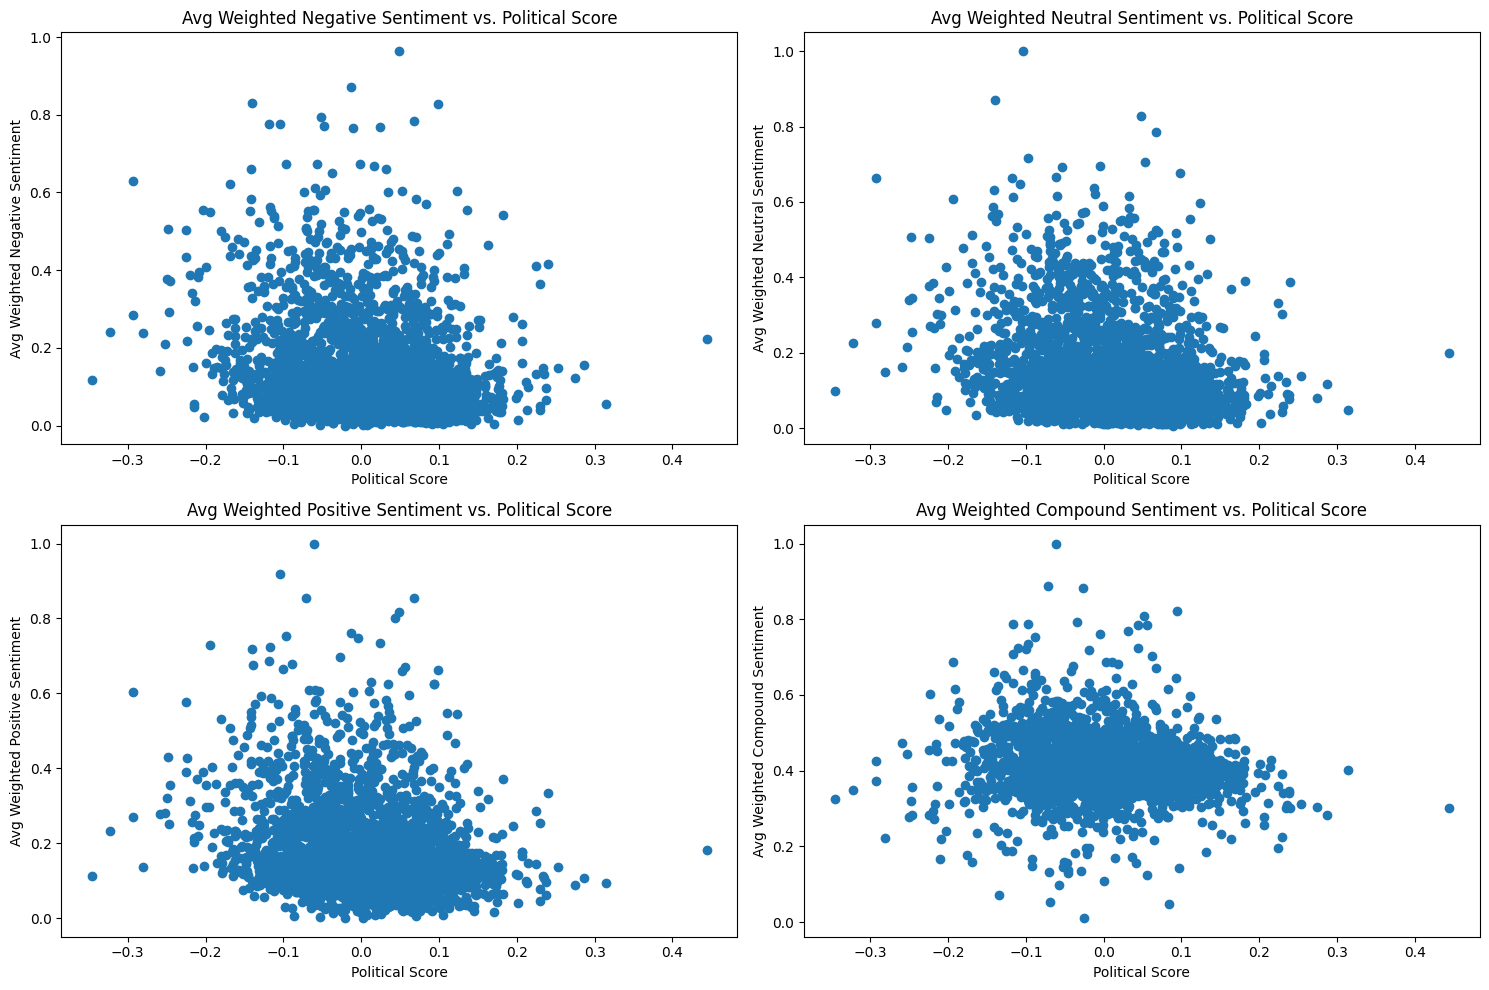

In [15]:
import matplotlib.pyplot as plt

# Assuming 'subreddit_df' is your DataFrame and it's already been created

# Set up the matplotlib figure and axes, making a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for Average Weighted Negative Sentiment vs. Political Score
axs[0, 0].scatter(subreddit_df['political_score'], subreddit_df['avg_weighted_negative'])
axs[0, 0].set_title('Avg Weighted Negative Sentiment vs. Political Score')
axs[0, 0].set_xlabel('Political Score')
axs[0, 0].set_ylabel('Avg Weighted Negative Sentiment')

# Scatter plot for Average Weighted Neutral Sentiment vs. Political Score
axs[0, 1].scatter(subreddit_df['political_score'], subreddit_df['avg_weighted_neutral'])
axs[0, 1].set_title('Avg Weighted Neutral Sentiment vs. Political Score')
axs[0, 1].set_xlabel('Political Score')
axs[0, 1].set_ylabel('Avg Weighted Neutral Sentiment')

# Scatter plot for Average Weighted Positive Sentiment vs. Political Score
axs[1, 0].scatter(subreddit_df['political_score'], subreddit_df['avg_weighted_positive'])
axs[1, 0].set_title('Avg Weighted Positive Sentiment vs. Political Score')
axs[1, 0].set_xlabel('Political Score')
axs[1, 0].set_ylabel('Avg Weighted Positive Sentiment')

# Scatter plot for Average Weighted Compound Sentiment vs. Political Score
axs[1, 1].scatter(subreddit_df['political_score'], subreddit_df['avg_weighted_compound'])
axs[1, 1].set_title('Avg Weighted Compound Sentiment vs. Political Score')
axs[1, 1].set_xlabel('Political Score')
axs[1, 1].set_ylabel('Avg Weighted Compound Sentiment')

# Adjust the layout so the plots are not overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# Define a threshold, e.g., 0, to separate left and right-leaning subreddits
threshold = 0

# Left-leaning subreddits (political score < threshold)
left_leaning_df = subreddit_df[subreddit_df['political_score'] < threshold]

# Right-leaning subreddits (political score >= threshold)
right_leaning_df = subreddit_df[subreddit_df['political_score'] >= threshold]


In [17]:
# Correlations in left-leaning subreddits
left_corr_neg = left_leaning_df['political_score'].corr(left_leaning_df['avg_weighted_negative'])
left_corr_neu = left_leaning_df['political_score'].corr(left_leaning_df['avg_weighted_neutral'])
left_corr_pos = left_leaning_df['political_score'].corr(left_leaning_df['avg_weighted_positive'])
left_corr_comp = left_leaning_df['political_score'].corr(left_leaning_df['avg_weighted_compound'])

# Correlations in right-leaning subreddits
right_corr_neg = right_leaning_df['political_score'].corr(right_leaning_df['avg_weighted_negative'])
right_corr_neu = right_leaning_df['political_score'].corr(right_leaning_df['avg_weighted_neutral'])
right_corr_pos = right_leaning_df['political_score'].corr(right_leaning_df['avg_weighted_positive'])
right_corr_comp = right_leaning_df['political_score'].corr(right_leaning_df['avg_weighted_compound'])

# Print the correlation coefficients
print("Left-leaning Subreddits:")
print(f"Negative: {left_corr_neg}, Neutral: {left_corr_neu}, Positive: {left_corr_pos}, Compound: {left_corr_comp}")

print("\nRight-leaning Subreddits:")
print(f"Negative: {right_corr_neg}, Neutral: {right_corr_neu}, Positive: {right_corr_pos}, Compound: {right_corr_comp}")


Left-leaning Subreddits:
Negative: -0.23194642845366079, Neutral: -0.20323258203715205, Positive: -0.23896622936532963, Compound: -0.039102663534588335

Right-leaning Subreddits:
Negative: 0.0012149948389457356, Neutral: -0.04182262606248226, Positive: -0.061476179672020514, Compound: -0.13862127753358247


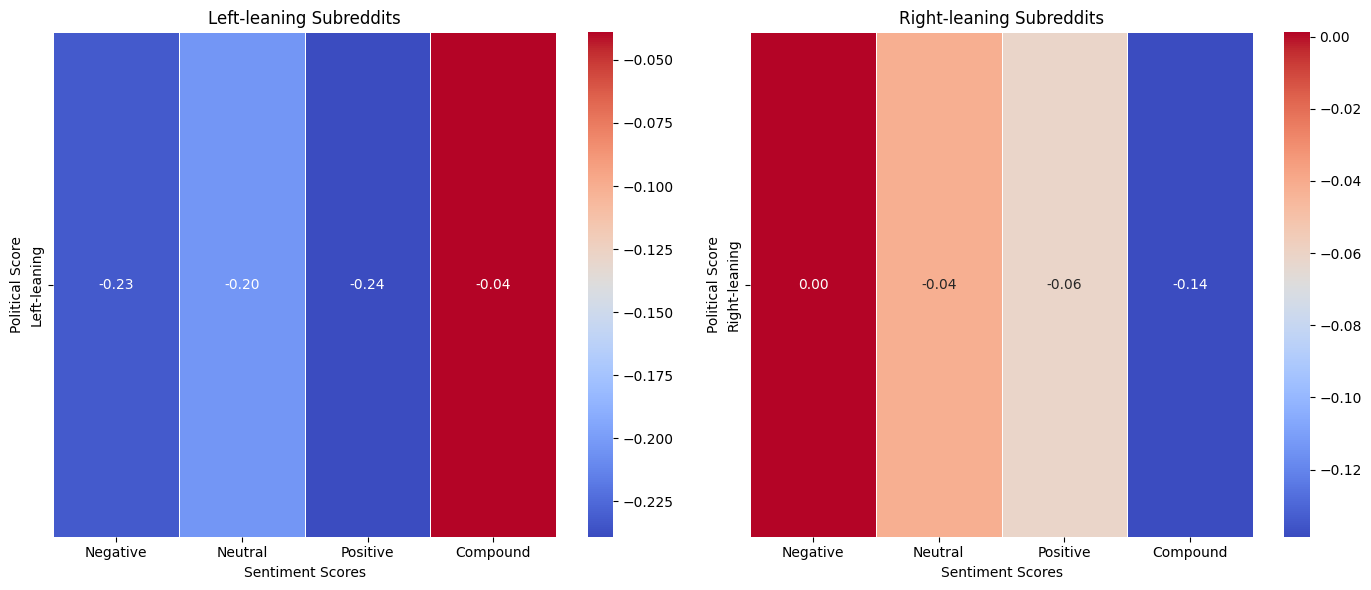

In [18]:


# Create DataFrames for the correlation coefficients
left_correlation_data = {
    'Negative': [left_corr_neg],
    'Neutral': [left_corr_neu],
    'Positive': [left_corr_pos],
    'Compound': [left_corr_comp]
}

right_correlation_data = {
    'Negative': [right_corr_neg],
    'Neutral': [right_corr_neu],
    'Positive': [right_corr_pos],
    'Compound': [right_corr_comp]
}

# Create DataFrames
left_correlation_df = pd.DataFrame(left_correlation_data, index=['Left-leaning'])
right_correlation_df = pd.DataFrame(right_correlation_data, index=['Right-leaning'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the left-leaning heatmap
sns.heatmap(left_correlation_df, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=axes[0])
axes[0].set_title('Left-leaning Subreddits')
axes[0].set_xlabel('Sentiment Scores')
axes[0].set_ylabel('Political Score')

# Plot the right-leaning heatmap
sns.heatmap(right_correlation_df, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=axes[1])
axes[1].set_title('Right-leaning Subreddits')
axes[1].set_xlabel('Sentiment Scores')
axes[1].set_ylabel('Political Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


The correlation results for left-leaning subreddits show negative values across all sentiment categories, indicating an inverse relationship between the extremity of political stance and sentiment scores. A more extreme left-leaning political stance correlates with lower negative, neutral, and positive sentiment scores, with the strongest inverse relationship observed in the positive sentiment category. The compound score's negative correlation, although weaker, still suggests that more extreme left-leaning stances might be associated with slightly less overall positivity in sentiment.

For right-leaning subreddits, the correlation values are closer to zero, especially for negative sentiment, indicating a very weak or no relationship with political extremity. The negative correlations for neutral and positive sentiments are also relatively weak, suggesting only a slight decrease in these sentiments as the political stance becomes more extreme. The compound score shows a negative correlation, implying that a more extreme right-leaning stance could be associated with a more negative overall sentiment, but again, the correlation is weak.

Overall, these correlations suggest that there might be a trend where more extreme political stances in both left and right-leaning subreddits are associated with less positive sentiment, but the effect is relatively modest.

In [19]:
from scipy.stats import pearsonr

# Calculate correlation and p-values for left-leaning subreddits
left_p_values = {sentiment: pearsonr(left_leaning_df['political_score'], left_leaning_df[f'avg_weighted_{sentiment}'])[1] for sentiment in ['negative', 'neutral', 'positive', 'compound']}

# Calculate correlation and p-values for right-leaning subreddits
right_p_values = {sentiment: pearsonr(right_leaning_df['political_score'], right_leaning_df[f'avg_weighted_{sentiment}'])[1] for sentiment in ['negative', 'neutral', 'positive', 'compound']}

# Output the p-values
print("P-values for Left-leaning Subreddits:", left_p_values)
print("\nP-values for Right-leaning Subreddits:", right_p_values)


P-values for Left-leaning Subreddits: {'negative': 1.657367850639738e-18, 'neutral': 1.7642316660655973e-14, 'positive': 1.4040715876228003e-19, 'compound': 0.1442225297083271}

P-values for Right-leaning Subreddits: {'negative': 0.9590661780816607, 'neutral': 0.07714438047491146, 'positive': 0.009338192843700223, 'compound': 3.998499737393287e-09}


The p-values indicate statistically significant relationships between political stance extremity and sentiment scores in left-leaning subreddits for negative, neutral, and positive sentiments. The compound sentiment in left-leaning subreddits does not show a significant correlation.

In right-leaning subreddits, the negative sentiment correlation is not significant. However, positive sentiment and compound sentiment scores do show statistically significant negative correlations with political stance extremity, with the compound sentiment displaying a very strong significance.

#### Correlation Heatmap Analysis

The heatmap visualizes the correlation coefficients between different sentiment scores and political orientation. Stronger colors indicate stronger correlations, either positive (red) or negative (blue), while lighter colors denote weaker correlations. 

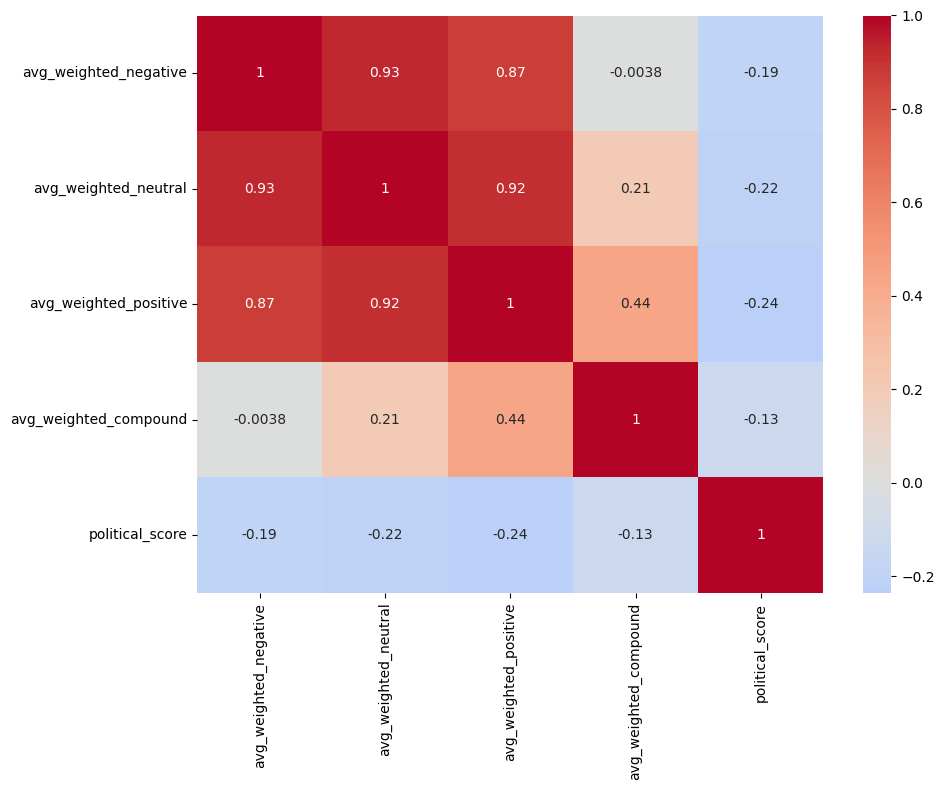

In [20]:
# Calculate the correlation matrix
correlation_matrix = subreddit_df[['avg_weighted_negative', 'avg_weighted_neutral', 'avg_weighted_positive', 'avg_weighted_compound', 'political_score']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


plt.tight_layout()
plt.show()


### Comparison of News-Related and Regular Posts

This section delves into comparing sentiment distribution between news-related and regular(non news-related) Reddit posts(submissions). By classifying and analyzing comments linked to news submissions, we aim to uncover distinct sentiment patterns that may arise from news content as opposed to regular discussions.

#### Methodology

- **Data Loading**: We load a cleaned dataset containing domain classifications to identify news-related submissions.
- **Comment Categorization**: Comments are categorized as news-related or non-news based on their associated submission domain.
- **Sentiment Distribution Analysis**: We compare sentiment scores across both categories using box plots to visualize the spread and central tendencies.
- **Frequency Distribution**: A histogram displays the frequency of comments across news-related subreddits.
- **Top Subreddits Analysis**: We focus on the top subreddits by comment count to assess political scores and average sentiment, providing a focused look at the most active news-discussing communities.
- **Correlation Visualization**: A scatter plot illustrates the relationship between political orientation and sentiment within the top news-related subreddits.


#### Visual Representations

Following the methodology, we present several plots:

- **Box Plots**: To compare the sentiment score distributions between news and non-news comments.
- **Histogram**: To showcase the distribution of comment counts among news-related subreddits.
- **Bar Charts**: To illustrate political and sentiment scores in top news-related subreddits.
- **Scatter Plot**: To explore the correlation between political scores and sentiment, annotated with subreddit names for deeper insight.



In [21]:
news_media_df = pd.read_csv('cleaned_mediascore.csv')

In [22]:
submissions_df['is_news'] = submissions_df['domain'].isin(news_media_df['clean_domains'])
news_submissions_ids = submissions_df[submissions_df['is_news']]['id'].unique()
news_submissions_ids

array(['t3_mimtud', 't3_gbctia', 't3_lkmer3', ..., 't3_ebotj5',
       't3_ckt9vc', 't3_ddiyz5'], dtype=object)

In [23]:
news_comments_df = comments_df[comments_df['link_id'].isin(news_submissions_ids)]
news_comments_df

,id,score,link_id,subreddit,created_utc,negative,neutral,positive,compound,weighted_negative,weighted_neutral,weighted_positive,weighted_compound
24065,t1_gtidcqs,1,t3_mimtud,MensRights,2021-04-05 23:23:35,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
28337,t1_fpbbcv3,2,t3_gbctia,MensRights,2020-05-03 00:36:09,0.421,0.515,0.064,-0.8074,0.842,1.030,0.128,-1.6148
29419,t1_fm3h4kb,1,t3_fseeik,OurPresident,2020-04-01 06:42:14,0.000,0.797,0.203,0.8480,0.000,0.797,0.203,0.8480
29458,t1_fm5yawq,2,t3_fseeik,OurPresident,2020-04-01 23:07:20,0.000,1.000,0.000,0.0000,0.000,2.000,0.000,0.0000
29520,t1_fmc6ssd,1,t3_fseeik,OurPresident,2020-04-03 18:52:53,0.181,0.728,0.091,-0.9882,0.181,0.728,0.091,-0.9882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40691160,t1_f9zqs7s,6,t3_e7eoy2,politics,2019-12-07 18:47:53,0.000,0.877,0.123,0.5423,0.000,5.262,0.738,3.2538
40704953,t1_f8hgd45,1,t3_e06qp0,nottheonion,2019-11-24 05:43:41,0.538,0.462,0.000,-0.5423,0.538,0.462,0.000,-0.5423
40705125,t1_eo6pp3r,0,t3_bqgw8h,worldnews,2019-05-20 03:49:05,0.000,1.000,0.000,0.0000,0.000,0.010,0.000,0.0000
40707793,t1_eeah9pu,3,t3_agxanb,worldnews,2019-01-17 18:32:30,0.000,1.000,0.000,0.0000,0.000,3.000,0.000,0.0000


In [24]:
# Create a DataFrame for non-news comments
non_news_comments_df = comments_df[~comments_df['link_id'].isin(news_submissions_ids)]
non_news_comments_df

,id,score,link_id,subreddit,created_utc,negative,neutral,positive,compound,weighted_negative,weighted_neutral,weighted_positive,weighted_compound
0,t1_ftjl56l,4,t3_gzv6so,BeautyGuruChatter,2020-06-10 02:19:18,0.234,0.402,0.364,0.5486,0.936,1.608,1.456,2.1944
1,t1_ftjpxmc,6,t3_gzv6so,BeautyGuruChatter,2020-06-10 03:06:22,0.000,0.783,0.217,0.3612,0.000,4.698,1.302,2.1672
2,t1_gzzxfyt,22,t3_nodb9e,BeautyGuruChatter,2021-05-30 18:12:37,0.050,0.830,0.119,0.7506,1.100,18.260,2.618,16.5132
3,t1_gzzy7nc,92,t3_no6qaj,BeautyGuruChatter,2021-05-30 18:19:03,0.390,0.610,0.000,-0.4939,35.880,56.120,0.000,-45.4388
4,t1_h00tpbp,82,t3_nolx7p,BeautyGuruChatter,2021-05-30 22:47:14,0.118,0.622,0.259,0.7906,9.676,51.004,21.238,64.8292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40720874,t1_ew3s0p8,1,t3_cmccmo,SquaredCircle,2019-08-06 12:02:27,0.127,0.623,0.250,0.6072,0.127,0.623,0.250,0.6072
40720875,t1_ennpzrt,1,t3_bp2f3w,AskReddit,2019-05-15 19:48:05,0.000,0.000,1.000,0.4404,0.000,0.000,1.000,0.4404
40720876,t1_f02psre,5,t3_d3f1tn,TheStrokes,2019-09-13 00:47:15,0.171,0.442,0.386,0.5983,0.855,2.210,1.930,2.9915
40720877,t1_f5t4bhw,1,t3_dp6jz9,ChoosingBeggars,2019-10-30 15:42:21,0.407,0.304,0.289,-0.1423,0.407,0.304,0.289,-0.1423


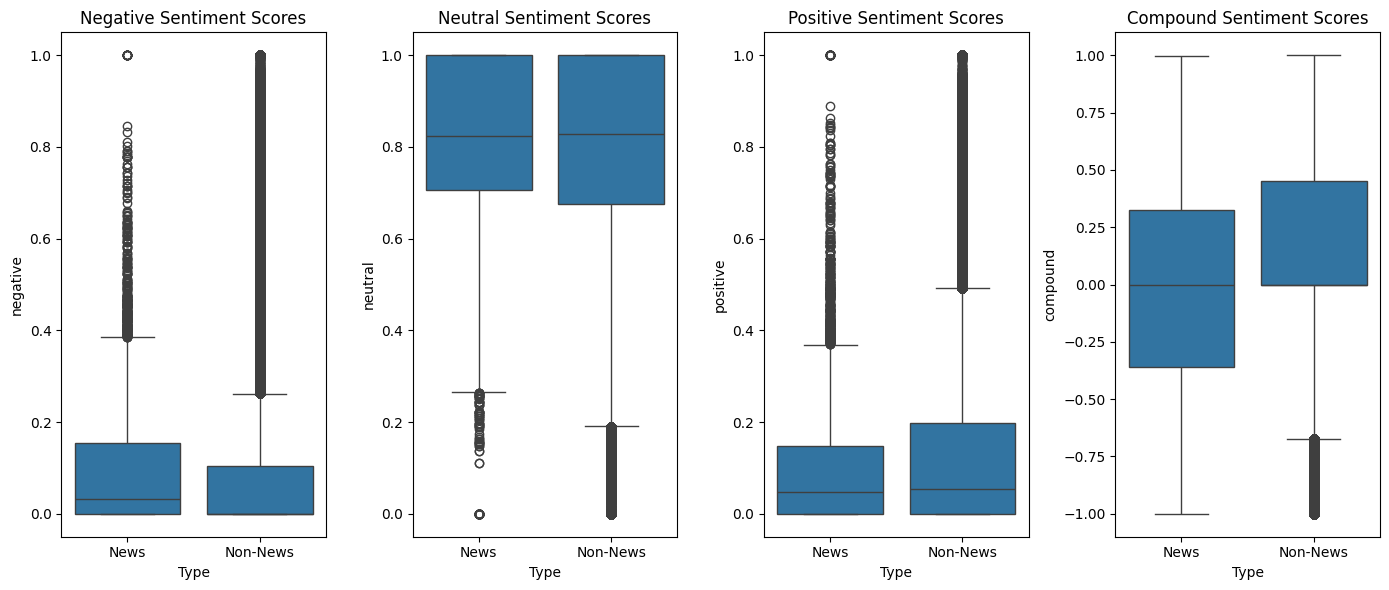

In [25]:

plt.figure(figsize=(14, 6))

# List of sentiment types
sentiments = ['negative', 'neutral', 'positive', 'compound']

# Loop through each sentiment type and create a subplot for each
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(1, 4, i)

    # Combine the data from both datasets for the current sentiment
    combined_data = pd.concat([
        news_comments_df[[sentiment]].assign(Type='News'),
        non_news_comments_df[[sentiment]].assign(Type='Non-News')
    ])

    # Create a boxplot
    sns.boxplot(x='Type', y=sentiment, data=combined_data)
    plt.title(f'{sentiment.capitalize()} Sentiment Scores')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()




1. **Negative Sentiment**: The median negative sentiment is lower for news-related comments compared to non-news comments, suggesting that news-related comments are generally less negative.

2. **Neutral Sentiment**: Both news and non-news comments have similar median neutral sentiment scores, but the interquartile range is slightly narrower for news-related comments, indicating less variability in neutrality among news-related comments.

3. **Positive Sentiment**: The median positive sentiment for news-related comments is lower than that for non-news comments, and the distribution for news comments is also more compressed, indicating a more consistent but lower level of positive sentiment.

4. **Compound Sentiment**: For compound sentiment, which combines all sentiment scores into one, the median score for news-related comments is slightly lower, and the interquartile range is wider than for non-news comments. This suggests a greater diversity of overall sentiment in news-related comments, with a tendency towards more negative scores.

These observations suggest that news-related comments may tend to be less negative and less positive than non-news comments, with a wider range of overall sentiment.

In [26]:
# Group by subreddit and count the number of comments
news_comment_counts = news_comments_df.groupby('subreddit').size()

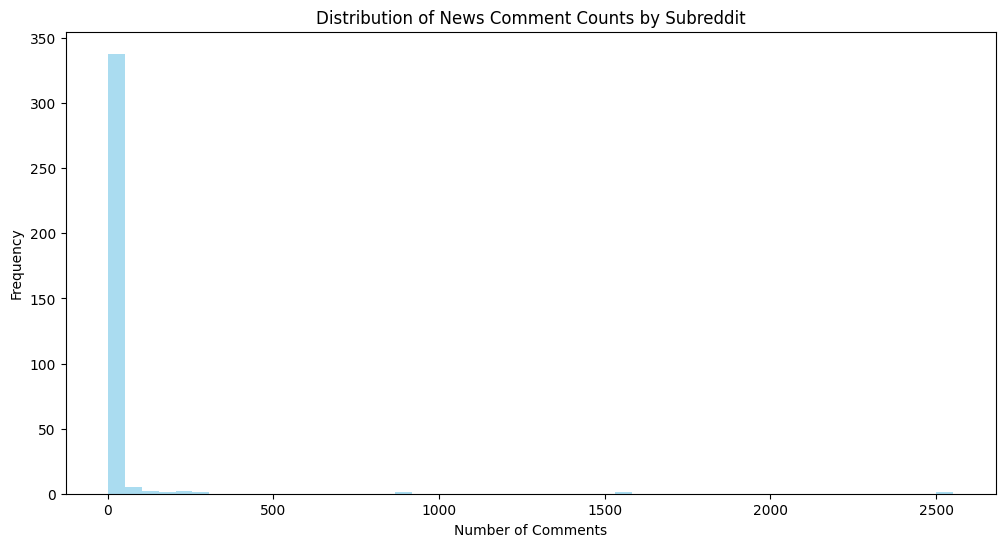

In [27]:
# Plot a histogram of the comment counts
plt.figure(figsize=(12, 6))
plt.hist(news_comment_counts, bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of News Comment Counts by Subreddit')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

We can tell that, in our dataset, most of the subreddit has very few news related comments.

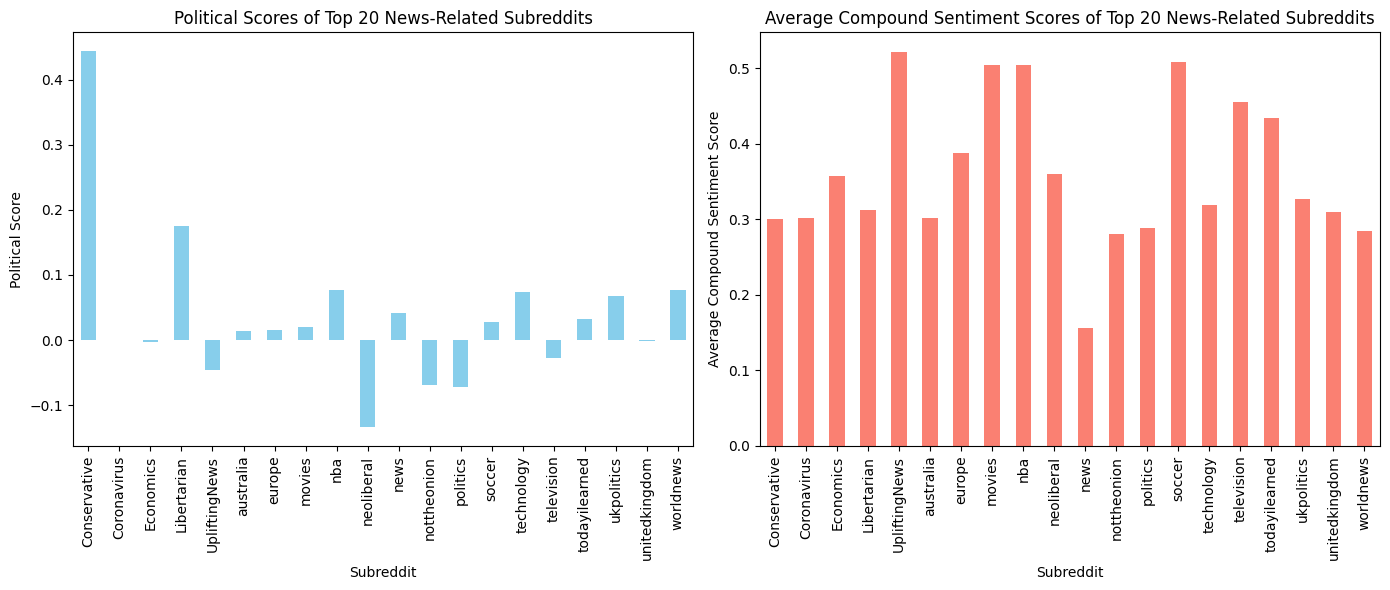

In [28]:

top_news_subreddits = news_comments_df['subreddit'].value_counts().head(20).index

top_subreddits_df = subreddit_df[subreddit_df['subreddit'].isin(top_news_subreddits)]


# Set figure size
plt.figure(figsize=(14, 6))

# Plot Political Scores
plt.subplot(1, 2, 1)
top_subreddits_df.set_index('subreddit')['political_score'].plot(kind='bar', color='skyblue')
plt.title('Political Scores of Top 20 News-Related Subreddits')
plt.ylabel('Political Score')
plt.xlabel('Subreddit')

# Plot Average Compound Sentiment Scores
plt.subplot(1, 2, 2)
top_subreddits_df.set_index('subreddit')['avg_weighted_compound'].plot(kind='bar', color='salmon')
plt.title('Average Compound Sentiment Scores of Top 20 News-Related Subreddits')
plt.ylabel('Average Compound Sentiment Score')
plt.xlabel('Subreddit')

# Adjust layout
plt.tight_layout()
plt.show()




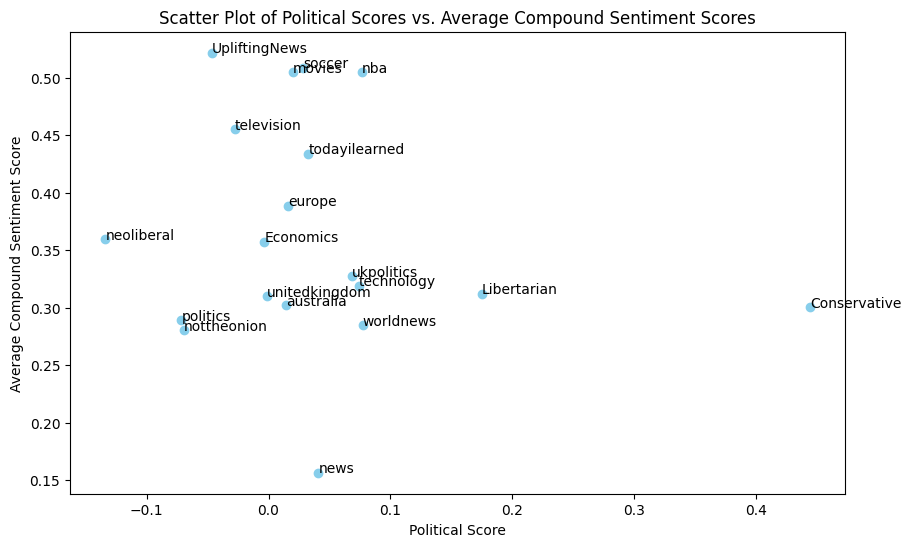

In [29]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_subreddits_df['political_score'], top_subreddits_df['avg_weighted_compound'], color='skyblue')

# Adding titles and labels
plt.title('Scatter Plot of Political Scores vs. Average Compound Sentiment Scores')
plt.xlabel('Political Score')
plt.ylabel('Average Compound Sentiment Score')

# Annotate each point with its subreddit name
for i, row in top_subreddits_df.iterrows():
    plt.annotate(row['subreddit'], (row['political_score'], row['avg_weighted_compound']))

# Show plot
plt.show()


The scatter plot show that most news-related subreddits have neutral political scores, with 'Conservative' being an outlier with a clear right-leaning stance. Sentiment across these subreddits is generally positive, with 'Conservative' and 'news' having the highest positive sentiment scores. The scatter plot does not indicate a strong relationship between political orientation and sentiment positivity, suggesting diverse sentiment expressions within news-related subreddits regardless of their political leanings.

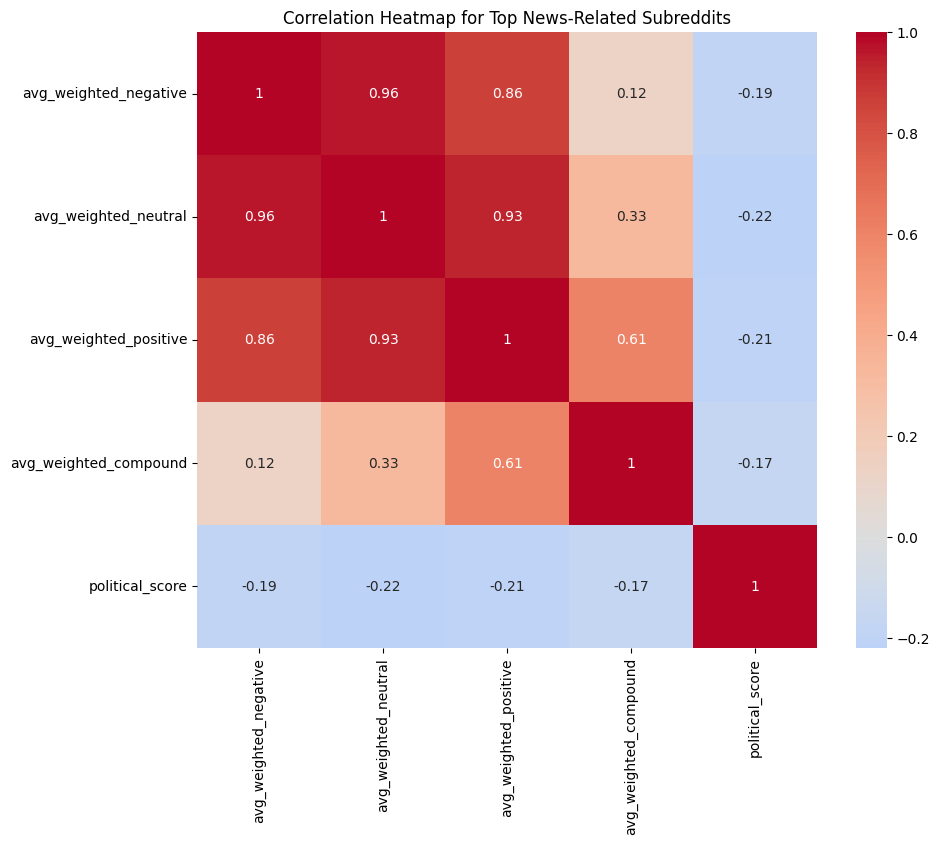

In [30]:
# Calculate the correlation matrix for sentiment and political scores
correlation_matrix = top_subreddits_df[['avg_weighted_negative', 'avg_weighted_neutral', 'avg_weighted_positive', 'avg_weighted_compound', 'political_score']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Top News-Related Subreddits')
plt.show()



The sentiment scores have low to negligible correlations with the political scores, indicating that sentiment expressed in these subreddits is mostly independent of their political orientation. The average weighted compound sentiment score, which combines all sentiment scores, also has a low correlation with political scores, further suggesting that the overall sentiment in these subreddits is not strongly influenced by their political leanings.

### Temporal Trends Analysis

This analysis aims to identify any noticeable trends over time in the sentiments expressed in different politically-oriented subreddits. The focus is particularly on how these trends might relate to major news events.

#### Methodology

- **Temporal Aggregation**: Comments are grouped by week, and sentiment scores are aggregated to observe temporal changes.
- **Trend Visualization**: Line plots are used to depict the number of comments and average sentiment scores over time.
- **Event Comparison**: Major news events are overlaid on the sentiment trend lines as vertical markers to facilitate a visual comparison.




#### Visualization Notes

- **Weekly Comment Trends**: A time series plot shows the volume of comments each week, highlighting periods of increased activity.
- **Sentiment Score Trends**: Separate time series plots for each sentiment score type illustrate how positive, negative, and neutral sentiments evolve over time.
- **Event Overlay**: Red vertical lines mark major news events, providing context for any sentiment fluctuations observed in the corresponding periods.

#### Insights



In [31]:

comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'])

# Set the period to weekly
comments_df['week'] = comments_df['created_utc'].dt.to_period('W')

# Count the number of comments per week
weekly_comment_counts = comments_df.groupby('week').size()

# Convert 'week' to the start date of each week (for plotting)
weekly_comment_counts.index = weekly_comment_counts.index.map(lambda x: x.start_time)



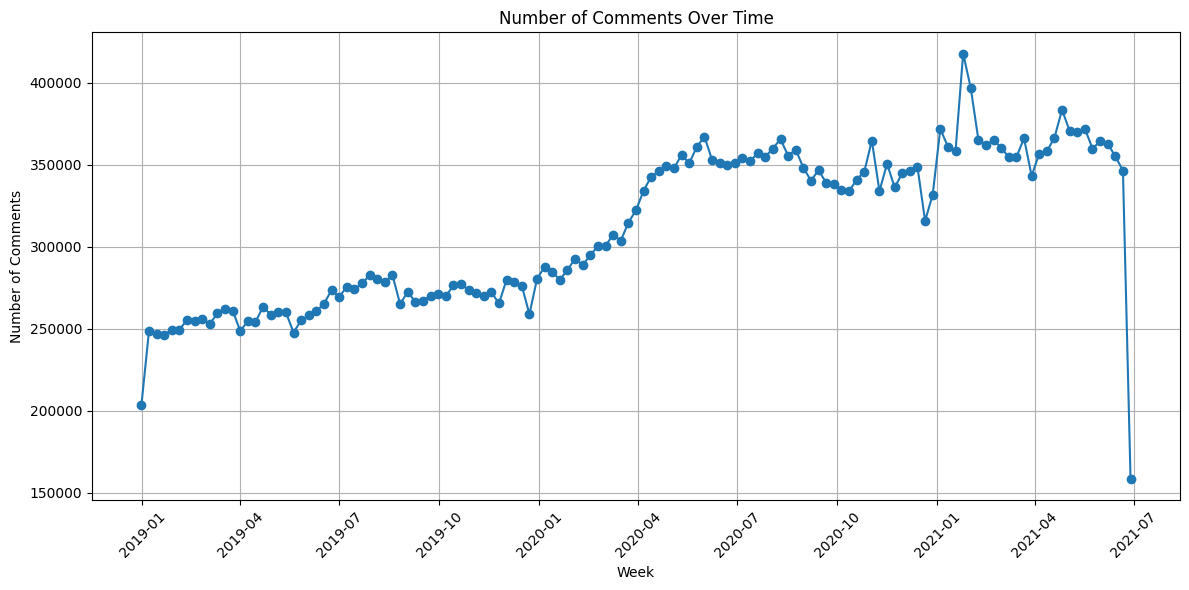

In [32]:

plt.figure(figsize=(12, 6))
plt.plot(weekly_comment_counts.index, weekly_comment_counts.values, marker='o', linestyle='-')
plt.title('Number of Comments Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:

# Group by week and calculate the average weighted sentiment scores
weekly_sentiments = comments_df.groupby('week').agg({
    'weighted_negative': 'mean',
    'weighted_neutral': 'mean',
    'weighted_positive': 'mean',
    'weighted_compound': 'mean'
}).reset_index()


In [34]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the sentiment score columns to scale
sentiment_scores = weekly_sentiments[['weighted_negative', 'weighted_neutral', 'weighted_positive', 'weighted_compound']]

# Fit and transform the data to scale between 0 and 1
scaled_sentiment_scores = scaler.fit_transform(sentiment_scores)

# Create a new DataFrame from the scaled data
scaled_sentiment_scores_df = pd.DataFrame(scaled_sentiment_scores, columns=sentiment_scores.columns)

# Add the 'week' column back into the scaled DataFrame
scaled_sentiment_scores_df['week'] = weekly_sentiments['week']

# Convert 'week' from Period to datetime for Matplotlib
scaled_sentiment_scores_df['week'] = scaled_sentiment_scores_df['week'].apply(lambda x: x.to_timestamp())



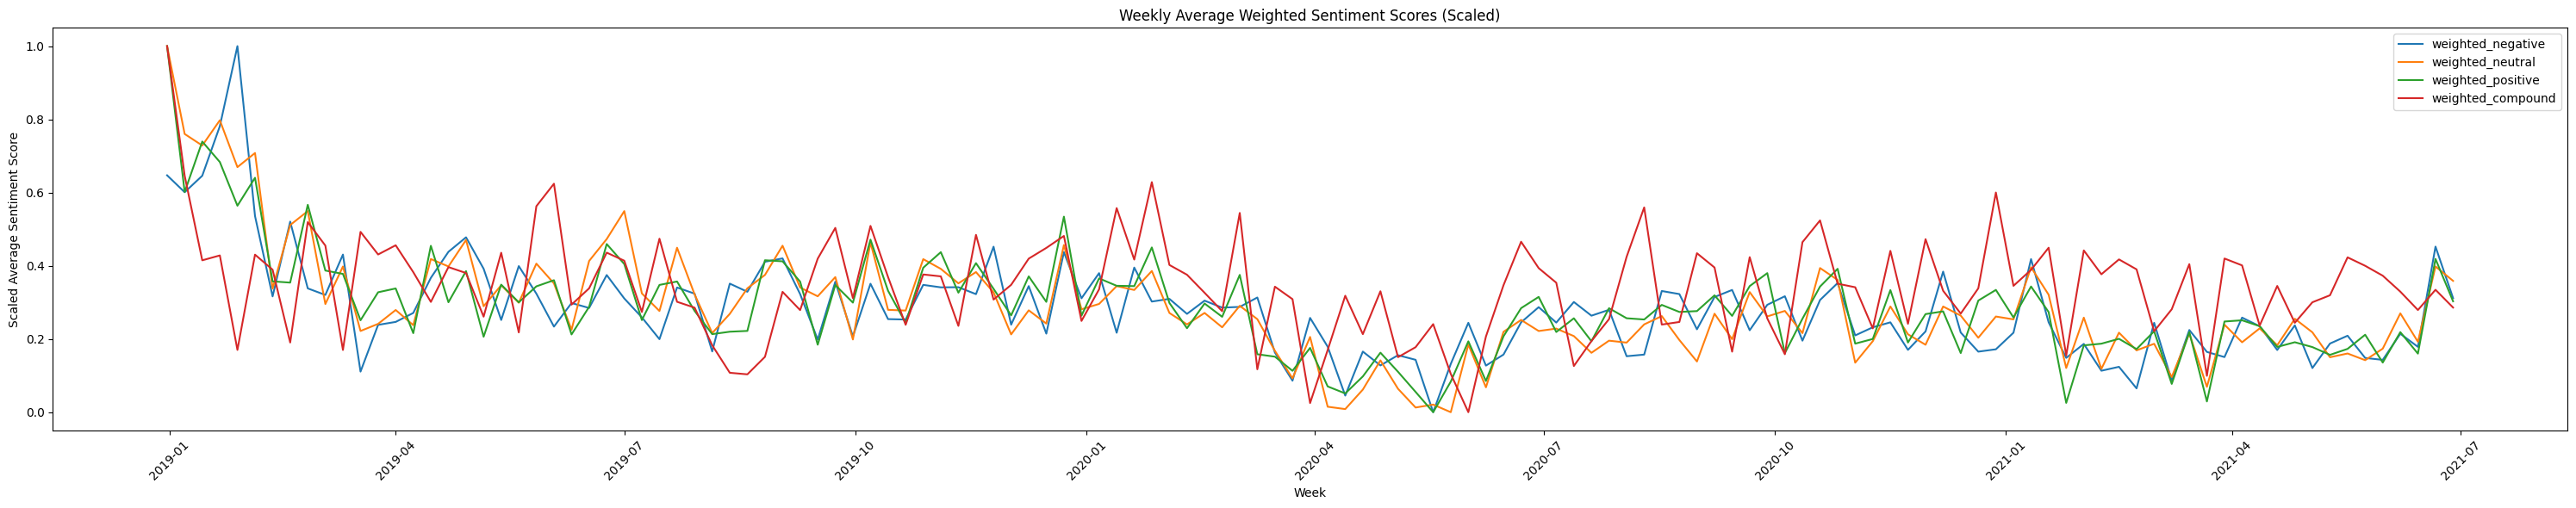

In [35]:
# Plotting the scaled scores
plt.figure(figsize=(30, 6))

# Plot each scaled sentiment score
for sentiment in scaled_sentiment_scores_df.columns[:-1]:  # Exclude the 'week' column
    plt.plot(scaled_sentiment_scores_df['week'], scaled_sentiment_scores_df[sentiment], label=sentiment)

plt.title('Weekly Average Weighted Sentiment Scores (Scaled)')
plt.xlabel('Week')
plt.ylabel('Scaled Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()
plt.show()


In [36]:
# Load the major events CSV file
events_df = pd.read_csv('expanded_major_events_2019_2021.csv')
events_df['Start Date'] = pd.to_datetime(events_df['Start Date']).dt.to_period('W')


In [37]:
import plotly.graph_objects as go
import plotly.express as px


In [38]:
# Convert 'Start Date' to Timestamp for Plotly
events_df['Start Date'] = events_df['Start Date'].dt.to_timestamp()


In [39]:
# Create the base time series plot for compound sentiment
fig = go.Figure()

# Add the sentiment time series
fig.add_trace(go.Scatter(x=weekly_sentiments['week'].dt.to_timestamp(), y=weekly_sentiments['weighted_compound'], mode='lines+markers', name='Average Compound Sentiment'))

# Add vertical lines for each major event
for _, row in events_df.iterrows():
    # Add a vertical line for the event
    fig.add_vline(x=row['Start Date'], line=dict(color="red", width=2, dash="dash"))
    
    # Add a hover label with the full event title
    fig.add_annotation(x=row['Start Date'], y=weekly_sentiments['weighted_compound'].max(),
                       text=row['Event'], showarrow=False, hovertext=row['Event'])

# Improve layout
fig.update_layout(
    title='Weekly Sentiment Trends in Subreddits Over Time',
    xaxis_title='Week',
    yaxis_title='Average Compound Sentiment Score',
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()
